In [99]:
import shapely
import calculate
import statestyle
import pandas as pd
import geopandas as gp
from shapely.geometry import Point

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
DATA_PATH= r"C:\Users\User\Downloads\ufo-scrubbed-geocoded-time-standardized.csv"

In [17]:
point_df = pd.read_csv( DATA_PATH,
    names=[
        'observed',
        'city',
        'state',
        'country',
        'shape',
        'unknown',
        'duration',
        'description',
        'recorded',
        'lat',
        'lng'
    ]
)

In [19]:
print(len(point_df))

80332


In [20]:
#Converting latitiude and Longitude points into float data types

In [21]:
point_df['lat'] = point_df.lat.apply(pd.to_numeric, args=('coerce',))
point_df['lng'] = point_df.lng.apply(pd.to_numeric, args=('coerce',))

In [ ]:
#Converting latitude and longitude points into 

In [22]:
point_df['geometry'] = point_df.apply(lambda z: Point(z.lng, z.lat), axis=1)

In [23]:
point_df

,observed,city,state,country,shape,unknown,duration,description,recorded,lat,lng,geometry
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,POINT (-97.9411111 29.8830556)
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,POINT (-98.581082 29.38421)
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,POINT (-2.916667 53.2)
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,POINT (-96.6458333 28.9783333)
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,POINT (-157.8036111 21.4180556)
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,POINT (-86.7844444 36.1658333)
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,POINT (-116.2025 43.6136111)
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,POINT (-122.2844444 38.2972222)
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,POINT (-77.2655556 38.9011111)


In [56]:
#import matplotlib as plt
#import matplotlib.pyplot as plt

In [76]:
point_gdf = gp.GeoDataFrame(point_df)

In [77]:
point_gdf.crs

In [78]:
point_gdf.crs = {'init': u'epsg:4269'}

In [79]:
point_gdf = point_gdf[point_gdf.is_valid == True]

In [80]:
counties_gdf = gp.read_file(r"C:\Users\User\Downloads\cb_2016_us_county_5m.shp")

In [81]:
counties_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [82]:
counties_gdf['STATE'] = counties_gdf.apply(
    lambda x: statestyle.get(x.STATEFP).ap,
    axis=1
)

In [83]:
counties_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STATE
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0...",Ariz.
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625...",Fla.
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0...",Kan.
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995...",Miss.
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655...",Mo.
...,...,...,...,...,...,...,...,...,...,...,...
3228,13,099,00345041,0500000US13099,13099,Early,06,1327612129,9717177,"POLYGON ((-85.11455 31.27630, -85.08977 31.295...",Ga.
3229,40,033,01101804,0500000US40033,40033,Cotton,06,1638566730,24095321,"POLYGON ((-98.66196 34.40595, -98.60954 34.406...",Okla.
3230,22,073,00558114,0500000US22073,22073,Ouachita,15,1580943091,55283099,"POLYGON ((-92.41535 32.49549, -92.41507 32.582...",La.
3231,48,495,01384033,0500000US48495,48495,Winkler,06,2178481652,414369,"POLYGON ((-103.32650 32.00037, -103.27852 32.0...",Texas


In [84]:
merged_gdf = gp.sjoin(counties_gdf, point_gdf, how="inner")

In [86]:
print(len(merged_gdf))

70864


In [87]:
county_counts = merged_gdf.groupby([
    "GEOID",
]).agg(dict(observed="count")).reset_index()

In [88]:
county_counts.columns = ['GEOID', 'SIGHTINGS']


In [89]:
county_counts_gdf = counties_gdf.merge(county_counts, on="GEOID", how="left")

In [90]:
county_counts_gdf[[
    'GEOID',
    'STATE',
    'NAME',
    'SIGHTINGS'
]].sort_values("SIGHTINGS", ascending=False).head(25)

,GEOID,STATE,NAME,SIGHTINGS
1617,06037,Calif.,Los Angeles,1987.0
2774,04013,Ariz.,Maricopa,1398.0
539,53033,Wash.,King,1373.0
1189,06073,Calif.,San Diego,901.0
2458,17031,Ill.,Cook,892.0
1401,06059,Calif.,Orange,720.0
1530,36061,N.Y.,New York,553.0
2611,32003,Nev.,Clark,537.0
2490,06065,Calif.,Riverside,531.0
392,06071,Calif.,San Bernardino,473.0


In [91]:
merged_gdf[merged_gdf.GEOID == '06037'][[
    'observed',
    'description'
]].head(25)

,observed,description
1617,7/23/2002 22:15,Triangle.
1617,7/23/2002 22:30,Triangle shaped light formation seen over Cata...
1617,3/1/2004 19:00,Round&#44 tall craft over Catalina Island&#44 ...
1617,7/23/2002 22:30,Very&#44 very&#44 big slow flying Triangle wit...
1617,3/10/2011 18:00,slow moving light as bright as brightest star ...
1617,12/11/2011 18:20,It was a small bright light like a falling sta...
1617,6/19/1992 20:00,strobe ufo over catalina
1617,6/22/2009 21:00,A ufo was going around the sky then a uso watc...
1617,7/23/2001 23:15,pausing&#44 pulsing objects near Catalina
1617,11/19/2003 20:00,Huge triangle object with big red pulsating li...


In [93]:
census_df = pd.read_csv(r"C:\Users\User\Downloads\PST045214.csv",  dtype=str
)[['fips', 'PST045214']]

In [94]:
census_df.columns = ['GEOID', 'POPULATION_2014']


In [95]:
census_df.POPULATION_2014 = census_df.POPULATION_2014.astype(int)

In [96]:
census_df.head()

,GEOID,POPULATION_2014
0,00000,318857056
1,01000,4849377
2,01001,55395
3,01003,200111
4,01005,26887


In [97]:
county_counts_with_pop_gdf = county_counts_gdf.merge(
    census_df,
    on="GEOID",
    how="left"
)


In [100]:
county_counts_with_pop_gdf['SIGHTINGS_PER_CAPITA'] = county_counts_with_pop_gdf.apply(
    lambda x: calculate.per_capita(x.SIGHTINGS, x.POPULATION_2014, 100000),
    axis=1
)

In [101]:
county_counts_with_pop_gdf[[
    'GEOID',
    'STATE',
    'NAME',
    'SIGHTINGS',
    'POPULATION_2014',
    'SIGHTINGS_PER_CAPITA'
]].sort_values("SIGHTINGS_PER_CAPITA", ascending=False).head(25)

,GEOID,STATE,NAME,SIGHTINGS,POPULATION_2014,SIGHTINGS_PER_CAPITA
3181,06003,Calif.,Alpine,6.0,1116.0,537.634409
835,31005,Neb.,Arthur,2.0,453.0,441.501104
1388,32017,Nev.,Lincoln,22.0,5184.0,424.382716
1420,20105,Kan.,Lincoln,13.0,3167.0,410.483107
1478,32009,Nev.,Esmeralda,3.0,822.0,364.963504
3180,32011,Nev.,Eureka,7.0,2018.0,346.878097
1238,06027,Calif.,Inyo,53.0,18410.0,287.887018
1752,35003,N.M.,Catron,10.0,3556.0,281.214848
770,48243,Texas,Jeff Davis,6.0,2204.0,272.232305
804,48399,Texas,Runnels,27.0,10416.0,259.216590


In [102]:
merged_gdf[merged_gdf.GEOID == '06003'][[
    'observed',
    'description'
]].head(25)

,observed,description
3181,8/15/2004 07:45,The 4 objects moved very rapidly from east to ...
3181,7/3/1995 10:30,Family of 5 witness peculiar &quot;silver&#44 ...
3181,6/5/2004 12:15,While fishing at Lake Alpine&#44 I saw what I ...
3181,8/13/1998 02:00,White spherical orb about three times the size...
3181,6/23/2001 22:45,an object in ca.had a large green light on the...
3181,8/11/2012 20:00,UFO seen near Lake Tahoe&#44 CA - emanated ora...


In [103]:
continental_us = shapely.geometry.box(-124.848974, 24.396308, 66.885444, 49.384358)

In [104]:
clipped_gdf = county_counts_with_pop_gdf[
    county_counts_with_pop_gdf.geometry.intersects(continental_us)
]

In [105]:
print(clipped_gdf.SIGHTINGS.sum())

70124.0


<Axes: >

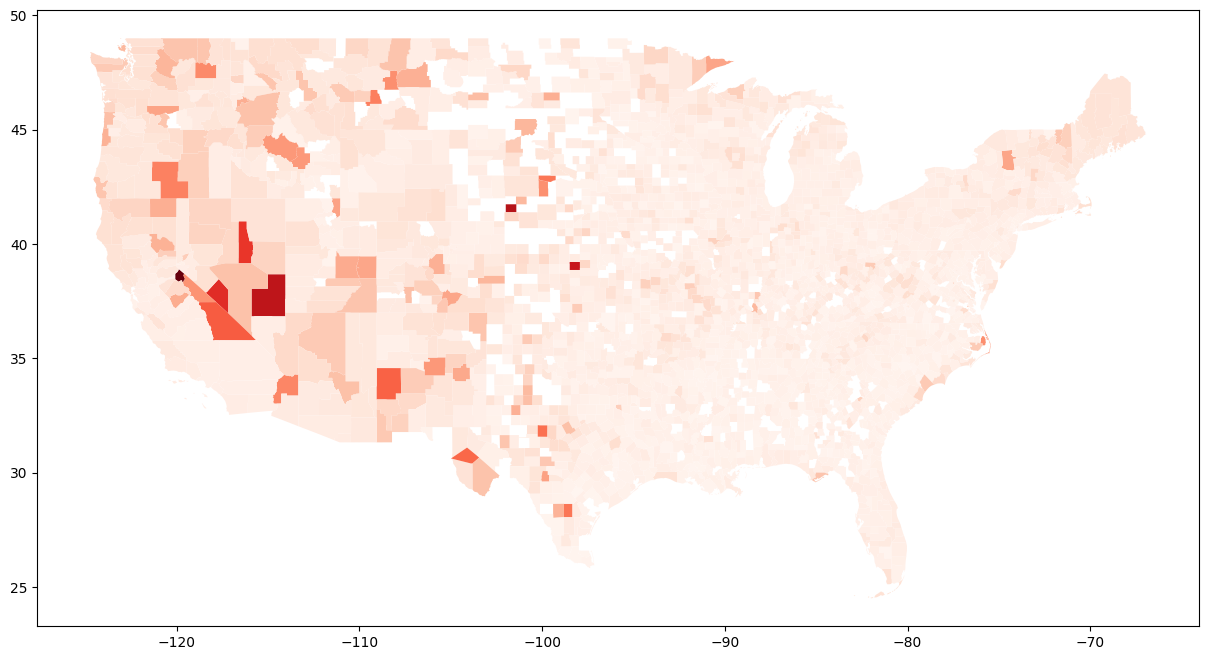

In [106]:
clipped_gdf.sort_values("SIGHTINGS", ascending=True).plot(
    column="SIGHTINGS_PER_CAPITA",
    cmap='Reds',
    figsize=(16, 8)
)